## Simple Linear Regression
<p>Based on Andrew Ng's lecture: Stanford Machine Learning</p>
<p>A dataset for this exercise is used to predict the profit for a given population of the city</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing dataset
df = pd.read_csv('data/ex1data1.csv')
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
# extracting the training data
X = df.iloc[:, :-1].values
y = df.iloc[:, 1:2].values

Text(0, 0.5, 'Profit in $ 10,000s')

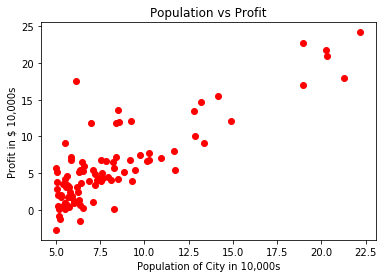

In [4]:
# plotting the training set 
plt.scatter(X, y, color='red')
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $ 10,000s')

In [5]:
# cost function
def computeCost(X, y, theta):
    yhat = np.dot(X, theta)
    J = (1/(2*m))*sum((yhat - y)**2)
    return J

# get the number of training examples
m = len(X)

# adding a column of 1's to X for theta_0
X_train = np.concatenate((np.ones((m,1)), X), axis=1)

# initializing theta, for single feature only 2 feature weights: theta_0 and theta_1
theta_prelim = np.zeros((2, 1))

# computing initial value of cost function
J = computeCost(X_train, y, theta_prelim)
print('Cost function J:', J)

Cost function J: [32.07273388]


In [6]:
# implementing gradient descent
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        yhat = X.dot(theta)
        gradients = (X.T).dot((yhat - y))
        theta = theta - alpha * (1/m) * gradients
        J_history[i] = computeCost(X, y, theta)
        
    # return theta and J_history
    return (theta, J_history)

In [7]:
# setting values for gradient descent implementation
# learning rate and no. of iterations
alpha = 0.01
num_iters = 5000

# calculate theta and J's
(theta, J_hist) = gradientDescent(X_train, y, theta_prelim, alpha, num_iters)

# print the minimum theta
print('theta:',theta)

theta: [[-3.89530051]
 [ 1.19298539]]


In [8]:
# model evaluation
RSS = ((y - X_train.dot(theta))**2).sum()  # RSS = Residual Sum of Squares
TSS = ((y - y.mean())**2).sum()            # TSS = Total Sum of Squares
R2 = 1 - RSS/TSS
print('R2 : ', R2)

R2 :  0.7020315523859603


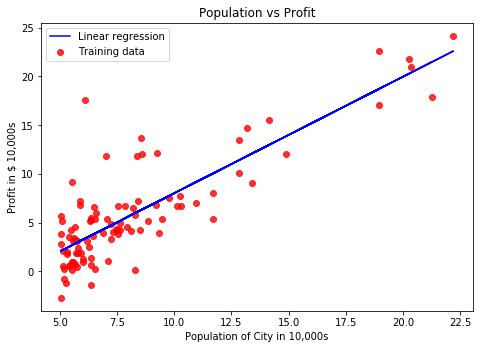

In [9]:
# Plotting the training results
fig = plt.figure()
axes = fig.add_axes([0,0,1.0,1.0])
axes.scatter(X, y, color='red', label='Training data', alpha=0.8)
axes.plot(X, X_train.dot(theta), color='blue', label='Linear regression')
axes.set_xlabel('Population of City in 10,000s')
axes.set_ylabel('Profit in $ 10,000s')
axes.set_title('Population vs Profit')
axes.legend()

## LINEAR REGRESSION USING SCIKIT-LEARN


In [10]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# retrieving the coefficient and intercept
theta_0 = reg.intercept_
theta_1 = reg.coef_

print('Y-itercept / bias, theta_0:', theta_0)
print('Slope of the line, theta_1:', theta_1)

Y-itercept / bias, theta_0: [-3.89578088]
Slope of the line, theta_1: [[1.19303364]]


In [14]:
# checking regression accuracy
from sklearn.metrics import r2_score
y_pred = reg.predict(X)
R2 = r2_score(y, y_pred)
print('r2 score :', R2)

r2 score : 0.7020315537841397
